**Общая информация**

**Срок сдачи:** 21 октября 2019, 08:30 

**Штраф за опоздание:** по 0.5 балла за 24 часа задержки. Через 10 дней домашнее задание сгорает.

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0919, Задание 1] Фамилия Имя.

Используйте данный Ipython Notebook при оформлении домашнего задания.


**Штрафные баллы:**

1. Невыполнение PEP8 -0.5 баллов
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов


In [31]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform

import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata, fetch_20newsgroups

from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KDTree
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder
import tqdm
%load_ext pycodestyle_magic

The pycodestyle_magic extension is already loaded. To reload it, use:
  %reload_ext pycodestyle_magic


##### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе. Score не должен уступать значению KNN из sklearn

In [208]:
%%pycodestyle


class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin,
                             SupervisedIntegerMixin, ClassifierMixin):
    def __init__(self, n_neighbors, algorithm='brute'):
        self._k = n_neighbors
        self.algorithm = algorithm

    def __del__(self):
        del self.X
        del self.y

    def fit(self, X, y):
        if y.shape[0] != X.shape[0]:
            print("wrong number of marks : y_train != X_train")
        if X.shape[0] < 2:
            print("fit with one element...jopa")
        self.X = np.array(X, dtype='float')
        self.y = y
        '''if type(X) == sp.sparse.csr.csr_matrix:
            if y.shape[0]!=X.shape[0]:
                print ("wrong number of marks : y_train != X_train")
            if X.shape[0]<2:
                print ("fit with one element...jopa")
            self.X = X
            self.y = y'''

    def predict(self, X):
        if self.algorithm == 'brute':
            rez = np.zeros(np.shape(X)[0], dtype=int)
            dist_matrix = squareform(pdist(
                np.concatenate((X, self.X), axis=0)))[:len(X), len(X): : 1]
            ykn = np.argpartition(dist_matrix, range(self._k), axis = 1)[:, :self._k]
            for j in range(np.shape(X)[0]):
                classes, cl_count = np.unique(self.y[ykn[j, :]], return_counts = True)
                rez[j] = classes[np.argsort(cl_count)][-1]
            return rez
        if self.algorithm == 'kd_tree':
            tree = KDTree(self.X, leaf_size=30)
            rez = np.zeros(np.shape(X)[0],dtype=int)
            distances, indexes = tree.query(X, k=self._k)
            for j in range(np.shape(X)[0]):
                classes, cl_count = np.unique(self.y[indexes[j]], return_counts = True)
                rez[j] = classes[np.argsort(cl_count)][-1]
            return rez
        '''if type(X) == sp.sparse.csr.csr_matrix:
            tree = KDTree(self.X, leaf_size=30)
            rez=np.zeros(np.shape(X)[0],dtype=int)
                distances, indexes = tree.query(X, k=self._k)
                for j in range(np.shape(X)[0]):
                    classes, cl_count = np.unique(self.y[indexes[j]], return_counts = True)
                    rez[j] = classes[np.argsort(cl_count)][-1]
                return rez'''
            
    def predict_proba(self, X):
        if self.algorithm == 'brute':
            rez = np.zeros((np.shape(X)[0], len(np.unique(self.y))), dtype = float)
            dist_matrix = squareform(pdist(np.concatenate((X, self.X), axis = 0)))[:len(X),len(X): : 1]
            ykn = np.argpartition(dist_matrix, range(self._k), axis = 1)[:, :self._k]
            for j in range(np.shape(X)[0]):
                classes, cl_count = np.unique(self.y[ykn[j, :]], return_counts = True)
                rez[j, classes] = cl_count / np.sum(cl_count)
            return rez
        if self.algorithm == 'kd_tree':
            tree = KDTree(self.X, leaf_size=30)
            rez = np.zeros((np.shape(X)[0], len(np.unique(self.y))), dtype = float)
            distances, indexes = tree.query(X, k=self._k)
            for j in tqdm.trange(np.shape(X)[0]):
                classes, cl_count = np.unique(self.y[indexes[j]], return_counts = True)
                rez[j, classes] = cl_count / np.sum(cl_count)
            return rez
            
    
    def score(self, X, y):
        return np.mean(self.predict(X)==y)

ValueError: too many values to unpack (expected 3)

**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [33]:
iris = datasets.load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

clf.fit(X_train, y_train)
my_clf.fit(X_train, y_train)

print(my_clf.score(X_test, y_test))
print(clf.score(X_test,y_test))
assert abs(my_clf.score(X_test, y_test) - clf.score(X_test,y_test))<0.005, "Score must be simillar"
'ну как бы не уступает'

0.8666666666666667
0.8666666666666667


'ну как бы не уступает'

**Задание 2 (0.5 балла)**

Давайте попробуем добиться скорости работы на fit, predict и predict_proba сравнимой со sklearn для iris.
Для этого используем numpy

In [34]:
%time clf.fit(X_train, y_train)

CPU times: user 404 µs, sys: 20 µs, total: 424 µs
Wall time: 426 µs


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [35]:
%time my_clf.fit(X_train, y_train)

CPU times: user 28 µs, sys: 9 µs, total: 37 µs
Wall time: 35 µs


In [36]:
%time clf.predict(X_test)

CPU times: user 2.02 ms, sys: 892 µs, total: 2.91 ms
Wall time: 2.05 ms


array([2, 0, 1, 0, 1, 0, 1, 1, 2, 1, 0, 1, 2, 0, 1])

In [37]:
%time my_clf.predict(X_test)

CPU times: user 1.12 ms, sys: 88 µs, total: 1.21 ms
Wall time: 1.18 ms


array([2, 0, 2, 0, 1, 0, 1, 2, 2, 1, 0, 1, 2, 0, 1])

In [38]:
%time clf.predict_proba(X_test)

CPU times: user 1.03 ms, sys: 334 µs, total: 1.37 ms
Wall time: 1.12 ms


array([[0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 0.5, 0.5],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0.5, 0.5],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ]])

In [39]:
%time my_clf.predict_proba(X_test)

CPU times: user 2.16 ms, sys: 1.54 ms, total: 3.69 ms
Wall time: 2.7 ms


array([[0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 0.5, 0.5],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0.5, 0.5],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ]])

###### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris.
Для этого используем numpy. Score не должен уступать значению KNN из sklearn

In [58]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [59]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [60]:
%time clf.fit(X_train, y_train)

CPU times: user 855 µs, sys: 222 µs, total: 1.08 ms
Wall time: 873 µs


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [61]:
%time my_clf.fit(X_train, y_train)

CPU times: user 31 µs, sys: 19 µs, total: 50 µs
Wall time: 47 µs


In [62]:
%time clf.predict(X_test)

CPU times: user 1.85 ms, sys: 158 µs, total: 2.01 ms
Wall time: 1.89 ms


array([0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 1, 2, 2, 0, 1])

In [63]:
%time my_clf.predict(X_test)

CPU times: user 1.95 ms, sys: 1.38 ms, total: 3.33 ms
Wall time: 2.02 ms


array([0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 1, 2, 2, 0, 1])

In [64]:
%time clf.predict_proba(X_test)

CPU times: user 1.96 ms, sys: 850 µs, total: 2.81 ms
Wall time: 4.68 ms


array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [65]:
%time my_clf.predict_proba(X_test)

100%|██████████| 15/15 [00:00<00:00, 3611.01it/s]

CPU times: user 5.29 ms, sys: 2.99 ms, total: 8.27 ms
Wall time: 8.56 ms


array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [66]:
print(my_clf.score(X_test, y_test))
print(clf.score(X_test,y_test))
assert abs(my_clf.score(X_test, y_test) - clf.score(X_test,y_test))<0.005, "Score must be simillar"

0.9333333333333333
0.9333333333333333


**Задание 4 (2.5 балла)**

Рассмотрим новый датасет 20 newsgroups

In [163]:
newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])

In [164]:
data = newsgroups['data']
target = newsgroups['target']
data[0]

'I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.'

In [165]:
len(target)

11314

Переведите во всех документах все буквы в нижний регистр и замените во всех документах символы, не
являющиеся буквами и цифрами, на пробелы. Далее разбейте текста по пробельным символам на токены(термы/слова). Удалите текста, содержащие только пробелы.

In [166]:
data_tok = [text.lower() for text in data]


for i in range(len(data_tok)):
    data_tok[i] = ''.join([x if(ord('0') <= ord(x) <= ord('9') or ord('a') <= ord(x) <= ord('z')) else ' ' for x in data_tok[i]])
    data_tok[i] = data_tok[i].split()

i = 0
n = len(data_tok)
while i < n:
    if data_tok[i] == []:
        del data_tok[i]
        target = np.delete(target, i)
        n -= 1
    else:
        i += 1
print(data_tok[0][0])
# data_tok should be a list of lists of tokens for each line in data.

i


In [167]:
assert all(isinstance(row, (list, tuple)) for row in data_tok), "please convert each line into a list of tokens (strings)"
assert all(all(isinstance(tok, str) for tok in row) for row in data_tok), "please convert each line into a list of tokens (strings)"
is_latin = lambda tok: all('a' <= x.lower() <= 'z' for x in tok)
assert all(map(lambda l: not is_latin(l) or l.islower() , map(' '.join, data_tok))), "please make sure that you lowercase the data and drop spaced texts"

In [168]:
# dictionary = set()
# for text in data_tok:
#     for word in text:
#         dictionary.add(word)
# dictionary = list(dictionary)
# dictionary

Преобразуйте датасет в разреженную матрицу scipy.sparse.csr_matrix, где значение x в позиции (i, j)
означает, что в документе i слово j встретилось x раз

In [169]:
from scipy.sparse import csr_matrix
# indptr = [0]
# indices = []
# tdata = []
# vocabulary = {}
# for d in data_tok:
#      for term in d:
#          index = vocabulary.setdefault(term, len(vocabulary))
#          indices.append(index)
#          tdata.append(1)
#      indptr.append(len(indices))
#matrix = csr_matrix((tdata, indices, indptr), dtype=int)
vocabulary = {}
for d in data_tok:
    for term in d:
        if term in vocabulary:
            vocabulary[term] += 1
        else:
            vocabulary[term] = 1
import operator

In [171]:
vocabulary
print(len(vocabulary))
jopa = list(vocabulary.items())
for (a,b) in jopa:
    if  b <= 10:
        del vocabulary[a]
    if b >= 2000:
        del vocabulary[a]
len(vocabulary)


13080


13080

In [172]:
jopa = list(vocabulary.items())

In [173]:
indptr = [0]
indices = []
data = []
for d in data_tok:
    for term in d:
        if term not in vocabulary:
            continue
        index = jopa.index((term, vocabulary[term]))
        indices.append(index)
        data.append(1)
    indptr.append(len(indices))

csr_matrix((data, indices, indptr), dtype=int).toarray()

array([[1, 2, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [176]:
matrix = csr_matrix((data, indices, indptr), dtype=int)

In [177]:
import gc
gc.collect()

40

*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

In [178]:
import sklearn as sk
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)

for train_index, test_index in kf.split(matrix):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = matrix[train_index], matrix[test_index]
    y_train, y_test = target[train_index], target[test_index]
    

TRAIN: [ 3668  3669  3670 ... 11001 11002 11003] TEST: [   0    1    2 ... 3665 3666 3667]
TRAIN: [    0     1     2 ... 11001 11002 11003] TEST: [3668 3669 3670 ... 7333 7334 7335]
TRAIN: [   0    1    2 ... 7333 7334 7335] TEST: [ 7336  7337  7338 ... 11001 11002 11003]


In [179]:
matrix

<11004x13080 sparse matrix of type '<class 'numpy.int64'>'
	with 1063306 stored elements in Compressed Sparse Row format>

Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальный score в среднем на валидации на 3 фолдах).
Постройте график зависимости среднего score от количества соседей. Можно рассмотреть число соседей от 1 до 10.

In [180]:
import gc
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()


In [181]:
ansi = -1
max_av_score = 0.0
for i in range(1, 11):
    av_score = 0.0
    for train_index, test_index in kf.split(matrix):
        X_train, X_test = matrix.toarray()[train_index], matrix.toarray()[test_index]
        y_train, y_test = target[train_index], target[test_index]
        
        MyKNN= KNeighborsClassifier(n_neighbors=i, algorithm='brute')
        MyKNN.fit(X_train, y_train)
        av_score += MyKNN.score(X_test, y_test)
        print(av_score)
        del X_train, X_test, y_train, y_test, MyKNN
    av_score /= 3
    
    if av_score > max_av_score:
        max_av_score = av_score
        ansi = i
    gc.collect()
print(ansi)
print(max_av_score)
    

0.29171210468920394
0.5733369683751364
0.8568702290076337
0.25081788440567065
0.4948200654307524
0.7415485278080698
0.2538167938931298
0.48827699018538717
0.7382769901853872
0.24482006543075246
0.46946564885496184
0.7082878953107961
0.23745910577971646
0.46401308615049075
0.6941112322791713
0.23582333696837512
0.46046892039258447
0.693565976008724
0.23555070883315157
0.46210468920392583
0.6900218102508179
0.22955288985823338
0.4531079607415486
0.6832061068702291
0.23200654307524538
0.4558342420937841
0.6780261723009815
0.22955288985823338
0.44929116684841874
0.6695747001090513
1
0.28562340966921124


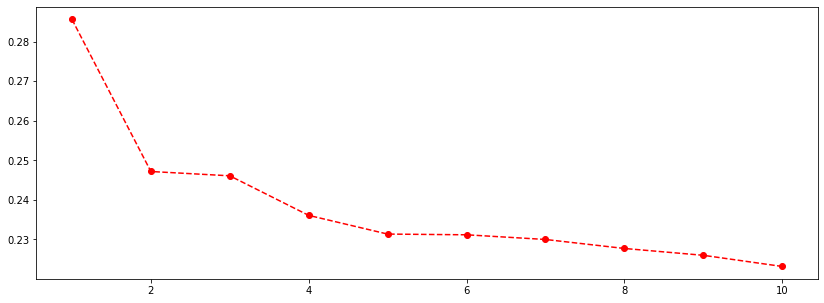

In [23]:
import matplotlib.pyplot as plt
import numpy as np
res = np.array([0.8568702290076337,
       0.7415485278080698,
       0.7382769901853872,
       0.7082878953107961,
       0.6941112322791713,
       0.693565976008724,
       0.6900218102508179,
       0.6832061068702291,
       0.6780261723009815,
       0.6695747001090513])
res = res / 3
fig = plt.figure(figsize= (14,5))
ax1 = fig.add_subplot(111)
ax1.plot(range(1, 11), res, 'or--')

Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf преобразование( sklearn.feature_extraction.text.TfidfTransformer)

Сравните модели, выберите лучшую.

Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

In [ ]:
newsgroups = fetch_20newsgroups(subset='test',remove=['headers','footers', 'quotes'])

Оценим качество(score) вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? Попробуйте сделать выводы, почему отличается качество.